# COS60008 Introduction to Data Science
## Assignment 3
## Student Details:
* Name: Kan Asvasena
* Student ID:
* Email:
* Submission Date: 23 June 2023
* TuteLab Class:

## Task 1 – Data Loading & Preparation

### 1.1 Import Dependencies and Settings

In [1]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

### 1.2 Load Data

In [2]:
path = '../data/original/'

data_1_env = pd.read_csv(path + '/data_1_env.csv')
data_2_env = pd.read_csv(path + '/data_2_env.csv')
data_3_crop = pd.read_csv(path + '/data_3_crop.csv')

### 1.3 Check Data

In [3]:
print(len(data_1_env))
data_1_env.head()


84


,Year,Location,Avg Min Temp *F,Yr Rain inches,Heat Wave,Dry Spell,Cold Wave,Wet Spell
0,1980,Emilyland,67.28,27.8717,N,N,Y,N
1,1980,East Xavierport,73.40,24.2319,N,N,Y,N
2,1980,North Daniel,69.80,48.4579,N,N,N,N
3,1981,Emilyland,67.82,33.5567,N,n,Y,N
4,1981,East Xavierport,73.76,23.2851,N,N,Y,N


In [4]:
print(len(data_2_env))
print(f'data_1_env + data_2_env = {len(data_1_env) + len(data_2_env)}')

data_2_env.head()

36
data_1_env + data_2_env = 120


,Year,Location,Avg Min Temp *C,Yr Rain mm,Heat Wave,Dry Spell,Cold Wave,Wet Spell
0,2008,East Xavierport,24.1,984.12,N,N,N,Y
1,2008,North Daniel,22.8,1735.49,N,N,N,Y
2,2008,Emilyland,21.0,1455.13,N,no,N,Y
3,2009,East Xavierport,24.4,1081.44,Y,N,N,Y
4,2009,North Daniel,22.4,1713.95,N,n,N,Y


In [5]:
print(len(data_3_crop))
data_3_crop.head()

125


,Year,Location,Irrigation,Crop Type,Crop Damage,Yield,Observer
0,1980.0,Emilyland,Y,Wheat,1.0,1287.55,Ryan Stewart
1,1980.0,East Xavierport,Y,Wheat,1.0,1426.41,Tracie Bell
2,1980.0,North Daniel,N,Maize,0.0,796.92,Thomas Miller
3,1981.0,Emilyland,Y,Wheat,1.0,1305.04,Sara Nguyen
4,1981.0,East Xavierport,Y,Maize,1.0,1031.42,Tracie Bell


In [6]:
data_3_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         124 non-null    float64
 1   Location     124 non-null    object 
 2   Irrigation   124 non-null    object 
 3   Crop Type    124 non-null    object 
 4   Crop Damage  124 non-null    float64
 5   Yield        124 non-null    float64
 6   Observer     124 non-null    object 
dtypes: float64(3), object(4)
memory usage: 7.0+ KB


### 1.4 Clean and Merge for 'data_1_env' and 'data_2_env'

In [7]:
# convert 'Avg Min Temp *F' from Fahrenheit to Celsius
data_1_env['Avg Min Temp *F'] = (data_1_env['Avg Min Temp *F'] - 32) * 5/9
# rename column from 'Avg Min Temp *F' to 'Avg Min Temp *C'
data_1_env.rename(columns={'Avg Min Temp *F': 'Avg Min Temp *C'}, inplace=True)

# convert 'Yr Rain inches' from inches to mm
data_1_env['Yr Rain inches'] = data_1_env['Yr Rain inches'] * 25.4
# rename column from 'Yr Rain inches' to 'Yr Rain mm'
data_1_env.rename(columns={'Yr Rain inches': 'Yr Rain mm'}, inplace=True)

data_1_env.head()

,Year,Location,Avg Min Temp *C,Yr Rain mm,Heat Wave,Dry Spell,Cold Wave,Wet Spell
0,1980,Emilyland,19.6,707.94118,N,N,Y,N
1,1980,East Xavierport,23.0,615.49026,N,N,Y,N
2,1980,North Daniel,21.0,1230.83066,N,N,N,N
3,1981,Emilyland,19.9,852.34018,N,n,Y,N
4,1981,East Xavierport,23.2,591.44154,N,N,Y,N


In [8]:
# merge data_1_env and data_2_env vertically
data_env = pd.concat([data_1_env, data_2_env], axis=0)
print(len(data_env))
data_env.head(10)

120


,Year,Location,Avg Min Temp *C,Yr Rain mm,Heat Wave,Dry Spell,Cold Wave,Wet Spell
0,1980,Emilyland,19.6,707.94118,N,N,Y,N
1,1980,East Xavierport,23.0,615.49026,N,N,Y,N
2,1980,North Daniel,21.0,1230.83066,N,N,N,N
3,1981,Emilyland,19.9,852.34018,N,n,Y,N
4,1981,East Xavierport,23.2,591.44154,N,N,Y,N
5,1981,North Daniel,21.0,1337.11950,N,N,N,N
6,1982,Emilyland,19.9,762.67056,0,N,Y,N
7,1982,East Xavierport,23.1,678.40098,N,N,Y,N
8,1982,North Daniel,21.1,1378.86186,N,N,N,N
9,1983,Emilyland,20.3,810.13046,N,N,yes,N


### 1.5 Clean and Merge for 'data_3_crop'

In [9]:
# show data_3_crop index 2-8
display(data_3_crop.iloc[2:9])
# drop data_3_crop index 5 as it is a duplication of index 6
data_3_crop.drop(5, inplace=True)

,Year,Location,Irrigation,Crop Type,Crop Damage,Yield,Observer
2,1980.0,North Daniel,N,Maize,0.0,796.92,Thomas Miller
3,1981.0,Emilyland,Y,Wheat,1.0,1305.04,Sara Nguyen
4,1981.0,East Xavierport,Y,Maize,1.0,1031.42,Tracie Bell
5,NaN,NaN,N,Soy,0.0,NaN,Tammy Calderon
6,1981.0,North Daniel,N,Soy,0.0,1497.04,Tammy Calderon
7,1982.0,Emilyland,Y,Soy,1.0,1601.38,Sara Nguyen
8,1982.0,East Xavierport,Y,Soy,1.0,1727.60,Amanda Reed


In [10]:
# show rows that contain NaN in data_3_crop
data_3_crop[data_3_crop.isnull().any(axis=1)]


,Year,Location,Irrigation,Crop Type,Crop Damage,Yield,Observer
18,1985.0,North Daniel,NaN,Wheat,0.0,1196.51,James Todd
36,1991.0,North Daniel,N,Soy,0.0,1493.71,NaN
78,2005.0,Emilyland,Y,Maize,NaN,968.42,Drew Barry
87,2007.0,North Daniel,N,NaN,0.0,783.27,Robert Reynolds


In [11]:
# show years that contain NaN to check
selected_years = [1991.0, 2005.0, 1985.0, 2007.0]

display(data_3_crop[data_3_crop['Year'].isin(selected_years)])

,Year,Location,Irrigation,Crop Type,Crop Damage,Yield,Observer
16,1985.0,East Xavierport,Y,Soy,1.0,1730.43,Noah Maldonado
17,1985.0,North Daniel,N,Wheat,0.0,1196.51,James Todd
18,1985.0,North Daniel,NaN,Wheat,0.0,1196.51,James Todd
19,1985.0,Emilyland,Y,Soy,1.0,1614.46,Diana Jones
35,1991.0,East Xavierport,Y,Soy,0.0,1744.47,Robert George
36,1991.0,North Daniel,N,Soy,0.0,1493.71,NaN
37,1991.0,North Daniel,N,Soy,0.0,1493.71,Jonathan Gregory
38,1991.0,Emilyland,Y,Wheat,0.0,1331.78,Sandra Thomas
78,2005.0,Emilyland,Y,Maize,NaN,968.42,Drew Barry
79,2005.0,Emilyland,Y,Maize,0.0,968.42,Drew Barry


In [12]:
# drop row 18, 36, 78, 87 as they are duplicated
data_3_crop.drop([18, 36, 78, 87], inplace=True)
display(data_3_crop[data_3_crop['Year'].isin(selected_years)])

,Year,Location,Irrigation,Crop Type,Crop Damage,Yield,Observer
16,1985.0,East Xavierport,Y,Soy,1.0,1730.43,Noah Maldonado
17,1985.0,North Daniel,N,Wheat,0.0,1196.51,James Todd
19,1985.0,Emilyland,Y,Soy,1.0,1614.46,Diana Jones
35,1991.0,East Xavierport,Y,Soy,0.0,1744.47,Robert George
37,1991.0,North Daniel,N,Soy,0.0,1493.71,Jonathan Gregory
38,1991.0,Emilyland,Y,Wheat,0.0,1331.78,Sandra Thomas
79,2005.0,Emilyland,Y,Maize,0.0,968.42,Drew Barry
80,2005.0,North Daniel,N,Soy,1.0,1487.11,Scott Clark
81,2005.0,East Xavierport,1,Soy,0.0,1756.30,Amy Brown
85,2007.0,Emilyland,Y,Wheat,0.0,1364.67,Stephanie Johnson


In [13]:
# merge data_env and data_3_crop horizontally
data = pd.merge(data_env, data_3_crop, on=['Year', 'Location'])


### 1.6 Clean the All Merged Data 'data' 

In [14]:
# cheak dtype, range/unique
data_reset = data.reset_index().copy()

data_check = pd.DataFrame({
    'column': data_reset.columns,
    'dtype': data_reset.dtypes.values,
    'range/unique': [
        str(data_reset[column].unique()).replace('\n', ' ') if data_reset[column].dtype == 'object' else str(data_reset[column].min()) + ' - ' + str(data_reset[column].max())
        for column in data_reset.columns
    ]
})

data_check

,column,dtype,range/unique
0,index,int64,0 - 119
1,Year,int64,1980 - 2019
2,Location,object,['Emilyland' 'East Xavierport' 'North Daniel']
3,Avg Min Temp *C,float64,19.6 - 25.3
4,Yr Rain mm,float64,591.4415399999999 - 2097.95
5,Heat Wave,object,['N' '0' 'Y' 'no' '1']
6,Dry Spell,object,['N' 'n' 'No' 'Y' '0' 'no']
7,Cold Wave,object,['Y' 'N' 'yes' 'No' '1' '0']
8,Wet Spell,object,['N' 'no' 'Y' 'Yes']
9,Irrigation,object,['Y' 'N' 'y' '1' 'no']


In [15]:
# replace the inconsistent values
data['Heat Wave'] = data['Heat Wave'].map({'N': 'No', '0': 'No', 'no': 'No', 'Y': 'Yes', '1': 'Yes'})
data['Dry Spell'] = data['Dry Spell'].map({'N': 'No', 'n': 'No', 'No': 'No', 'no': 'No', '0': 'No', 'Y': 'Yes'})
data['Cold Wave'] = data['Cold Wave'].map({'N': 'No', 'No': 'No', '0': 'No', 'Y': 'Yes', 'yes': 'Yes', '1': 'Yes'})
data['Wet Spell'] = data['Wet Spell'].map({'N': 'No', 'no': 'No', 'Y': 'Yes', 'Yes': 'Yes'})
data['Irrigation'] = data['Irrigation'].map({'N': 'No', 'no': 'No', '0': 'No', 'Y': 'Yes', 'y': 'Yes', '1': 'Yes'})
data['Crop Damage'] = data['Crop Damage'].map({0.0: 'No', 1.0: 'Yes'})

In [16]:
# cheak dtype, range/unique after replacing
data_reset = data.reset_index().copy()

data_check = pd.DataFrame({
    'column': data_reset.columns,
    'dtype': data_reset.dtypes.values,
    'range/unique': [
        str(data_reset[column].unique()).replace('\n', ' ') if data_reset[column].dtype == 'object' else str(data_reset[column].min()) + ' - ' + str(data_reset[column].max())
        for column in data_reset.columns
    ]
})

data_check

,column,dtype,range/unique
0,index,int64,0 - 119
1,Year,int64,1980 - 2019
2,Location,object,['Emilyland' 'East Xavierport' 'North Daniel']
3,Avg Min Temp *C,float64,19.6 - 25.3
4,Yr Rain mm,float64,591.4415399999999 - 2097.95
5,Heat Wave,object,['No' 'Yes']
6,Dry Spell,object,['No' 'Yes']
7,Cold Wave,object,['Yes' 'No']
8,Wet Spell,object,['No' 'Yes']
9,Irrigation,object,['Yes' 'No']


### 1.7 Check Anomaly

<Axes: ylabel='Frequency'>

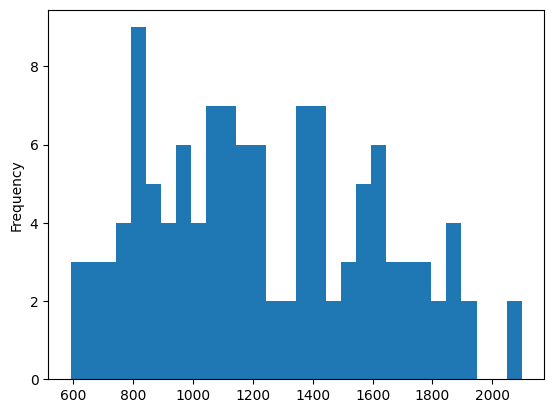

In [17]:
# plot histogram for 'Yr Rain mm'
data['Yr Rain mm'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

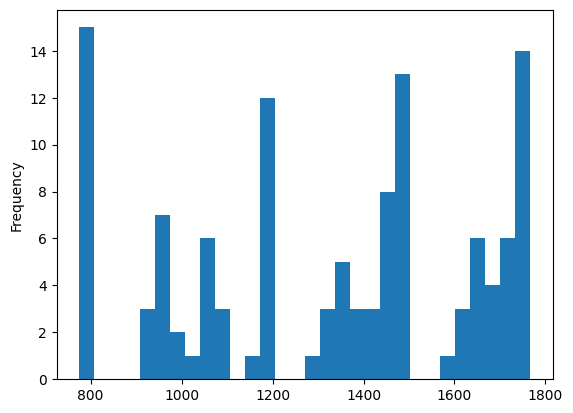

In [18]:
# plot histogram for 'Yield'
data['Yield'].plot.hist(bins=30)


There is no anomaly in the data to deal with.

### 1.8 Save the Cleaned and Merged Data as 'clean_data.csv'

In [19]:
data.to_csv('../data/processed/clean_data.csv', index=False)